In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
#sys.path.append('C:\\Users\\brittany henderson\\GitHub\\GBM_for_CPTAC\\')
#import cis_functions as f

import cptac
import cptac.utils as u


In [43]:

Gbm = cptac.Gbm()


In [46]:
prot_CNV_Gbm = Gbm.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")
prot_CNV_Gbm = prot_CNV_Gbm[["EGFR_proteomics","EGFR_CNV"]]
#do a linear regression to see if it's a meaningful association
#linear regression really hates it when there are NaN, right?
#dropna will remove rows with nan
prot_CNV_Gbm = prot_CNV_Gbm.dropna(axis=0, how="any")

x1 = prot_CNV_Gbm[["EGFR_CNV"]].values
y1 = prot_CNV_Gbm[["EGFR_proteomics"]].values
x1 = x1[:,0]
y1 = y1[:,0]


slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
print ('Slope of regression: %s\nR-squared: %s\nP-value: %s'%(slope, r_value**2, p_value))

Slope of regression: 0.6260968485731704
R-squared: 0.7246584449114108
P-value: 1.2353304790088638e-28


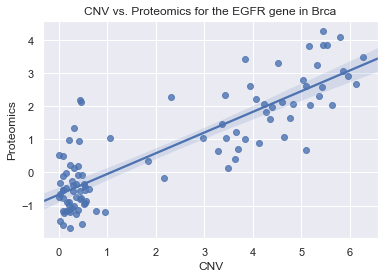

In [45]:
# plot 
sns.set(style="darkgrid")
plot = sns.regplot(x=x1, y=y1, data=prot_CNV_Brca)
plot.set(xlabel='CNV', ylabel='Proteomics', title='CNV vs. Proteomics for the EGFR gene in Brca')
plt.show()